In [1]:
import os
import tweepy as tw
import pandas as pd
from textblob import TextBlob
import re
import nltk
from nltk.tokenize import TweetTokenizer
import numpy as np
from nltk.corpus import stopwords
import string
from nltk import FreqDist
import seaborn as sns

import warnings

In [2]:
df=pd.read_csv('C:/Users/anshi/Desktop/143P/D1search_results_Pence.csv')
df

,user_country,source,content,date
0,Canada,Twitter Web App,@Mike_Pence @realDonaldTrump Even better than ...,2020-09-29T23:59:59+00:00
1,"Texas, USA",Twitter for iPhone,@Mike_Pence @realDonaldTrump Mike is just plai...,2020-09-29T23:59:56+00:00
2,Arizona,Twitter Web App,@kit10phish @Mike_Pence @OcrazioCornPop @dougd...,2020-09-29T23:59:56+00:00
3,NaN,Twitter for iPhone,@SPICYMOOSEBALLS @gnarlyballs @MilitaryStart4 ...,2020-09-29T23:59:54+00:00
4,"Colorado, USA",Twitter Web App,@Mike_Pence @realDonaldTrump I actually feel a...,2020-09-29T23:59:52+00:00
...,...,...,...,...
1995,Out the Door,Twitter Web App,"See All Tomorrow!! Stuff to do &amp; Then, the...",2020-09-29T22:59:38+00:00
1996,Somewhere wrting my ❤️ out,Twitter for iPhone,@Mike_Pence Why do you keep saying this? I tho...,2020-09-29T22:59:35+00:00
1997,NaN,Twitter for iPhone,@MollyJongFast Pence looks like he’s about to ...,2020-09-29T22:59:34+00:00
1998,NaN,Twitter for iPhone,@charliekirk11 We know that it was a hoax by t...,2020-09-29T22:59:34+00:00


In [3]:
tknzr = TweetTokenizer()

def tokenizer_tweets(df):
    
    text = ''
    for t in df['content']:
        text += t
    tokens = [i.lower() for i in tknzr.tokenize(text)]
    
    return tokens

tokens = tokenizer_tweets(df)
print(len(tokens))
print(tokens[:20])

48914
['@mike_pence', '@realdonaldtrump', 'even', 'better', 'than', 'biden', 'beating', 'trump', '.', 'will', 'be', 'kamala', 'wiping', 'you', 'up', 'off', 'the', 'floor', '.', '#bidenharristosaveamerica']


In [4]:
mean = np.mean([len(i) for i in df.content])

print("The lenght's average in tweets: %.2f%%" % mean)

The lenght's average in tweets: 142.54%


In [5]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anshi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
punctiuation = list(string.punctuation)
stop = stopwords.words('english') + punctiuation

def clear_tokens(tokens):
    
    tokens_cl = [t for t in tokens if (len(t) >= 3) 
                 and (not t.startswith(('#', '@')))
                 and (not t.startswith('http'))
                 and (t not in stop)
                 and (t[0].isalpha())]
    
    return tokens_cl

tokens_cl = clear_tokens(tokens)
print(len(tokens_cl))
print(tokens_cl[:20])

18145
['even', 'better', 'biden', 'beating', 'trump', 'kamala', 'wiping', 'floor', 'mike', 'plain', 'likable', 'thought', 'however', 'put', 'look', 'ripple', 'effect', 'consumers', 'still', 'voting']


In [7]:
def get_top20_of(i, n=20):
    return FreqDist([t for t in tokens if t.startswith(i)]).most_common(n)

In [8]:
get_top20_of('@')

[('@mike_pence', 840),
 ('@realdonaldtrump', 455),
 ('@vp', 379),
 ('@joebiden', 63),
 ('@markknoller', 59),
 ('@potus', 52),
 ('@secpompeo', 51),
 ('@gop', 46),
 ('@flotus', 45),
 ('@secretservice', 41),
 ('@genflynn', 40),
 ('@fbi', 40),
 ('@kamalaharris', 40),
 ('@senatemajldr', 40),
 ('@gnarlyballs', 39),
 ('@godisback5', 39),
 ('@toddhassinger11', 39),
 ('@unicornpoop99', 39),
 ('@novaseline4you', 39),
 ('@chubbs172', 39)]

In [9]:
def clean_tweet(tweet):
    '''
    Function to clean the text in a tweet by removing links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def get_tweet_sentiment(tweet):
    #Function to classify sentiments of passed tweets using TextBlob's sentiment method
    analysis = TextBlob(clean_tweet(tweet))
    #set sentiments
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [10]:
df['sentiment'] = [get_tweet_sentiment(t) for t in df.content]
df

,user_country,source,content,date,sentiment
0,Canada,Twitter Web App,@Mike_Pence @realDonaldTrump Even better than ...,2020-09-29T23:59:59+00:00,Positive
1,"Texas, USA",Twitter for iPhone,@Mike_Pence @realDonaldTrump Mike is just plai...,2020-09-29T23:59:56+00:00,Positive
2,Arizona,Twitter Web App,@kit10phish @Mike_Pence @OcrazioCornPop @dougd...,2020-09-29T23:59:56+00:00,Neutral
3,NaN,Twitter for iPhone,@SPICYMOOSEBALLS @gnarlyballs @MilitaryStart4 ...,2020-09-29T23:59:54+00:00,Positive
4,"Colorado, USA",Twitter Web App,@Mike_Pence @realDonaldTrump I actually feel a...,2020-09-29T23:59:52+00:00,Negative
...,...,...,...,...,...
1995,Out the Door,Twitter Web App,"See All Tomorrow!! Stuff to do &amp; Then, the...",2020-09-29T22:59:38+00:00,Neutral
1996,Somewhere wrting my ❤️ out,Twitter for iPhone,@Mike_Pence Why do you keep saying this? I tho...,2020-09-29T22:59:35+00:00,Positive
1997,NaN,Twitter for iPhone,@MollyJongFast Pence looks like he’s about to ...,2020-09-29T22:59:34+00:00,Neutral
1998,NaN,Twitter for iPhone,@charliekirk11 We know that it was a hoax by t...,2020-09-29T22:59:34+00:00,Neutral


In [11]:
df.sentiment.value_counts()

Positive    781
Neutral     757
Negative    462
Name: sentiment, dtype: int64

In [12]:
pos_tweets = df[(df.sentiment == 'Positive')] 
neu_tweets = df[(df.sentiment == 'Neutral')]                                                                   
neg_tweets = df[(df.sentiment == 'Negative')]  
                                                                        
print("Percentage of positive tweets: %.2f%%" %(len(pos_tweets)*100/len(df.sentiment)))
print("Percentage of neutral tweets: %.2f%%" %(len(neu_tweets)*100/len(df.sentiment)))
print("Percentage of negative tweets: %.2f%%" %(len(neg_tweets)*100/len(df.sentiment)))

Percentage of positive tweets: 39.05%
Percentage of neutral tweets: 37.85%
Percentage of negative tweets: 23.10%


In [13]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

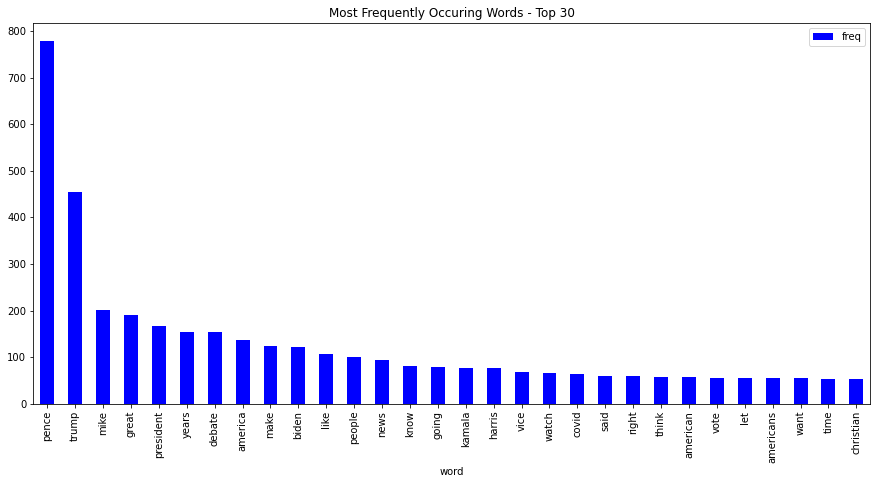

In [14]:
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(tokens_cl)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

Text(0.5, 1.0, 'WordCloud - Comments for Debate1')

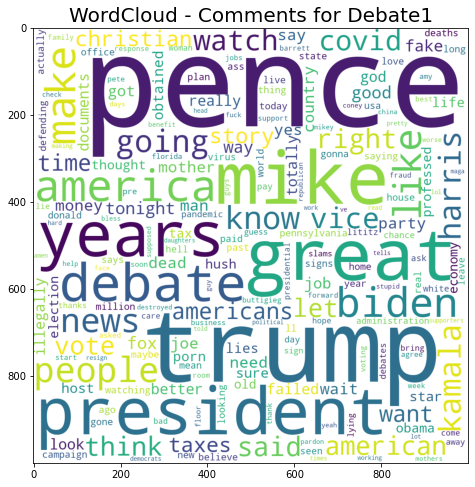

In [15]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Comments for Debate1", fontsize = 20)

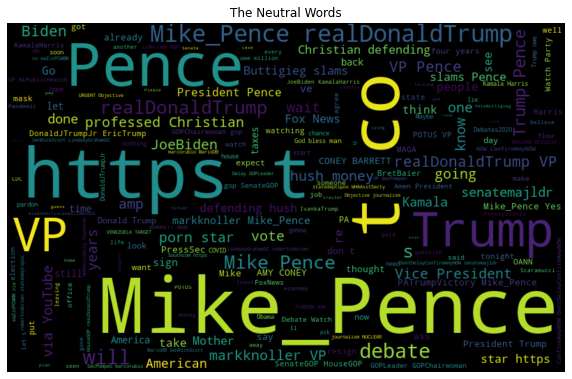

In [16]:
normal_words =' '.join([ content for content in df['content'][df['sentiment'] == 'Neutral']])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()

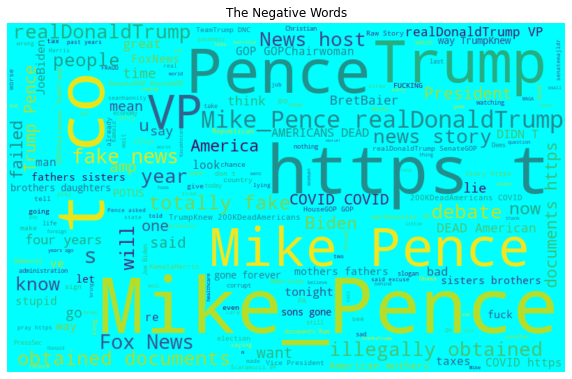

In [17]:
negative_words =' '.join([ content for content in df['content'][df['sentiment'] == 'Negative']])

wordcloud = WordCloud(background_color = 'cyan', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()

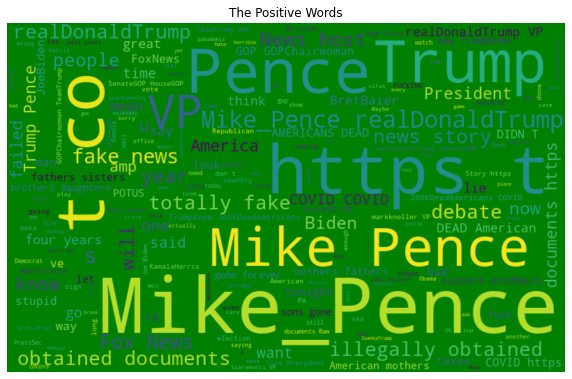

In [18]:
positive_words =' '.join([ content for content in df['content'][df['sentiment'] == 'Positive']])

wordcloud = WordCloud(background_color = 'green', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Positive Words')
plt.show()

In [19]:
df.drop(['user_country','source','date'],axis=1,inplace=True)
df

,content,sentiment
0,@Mike_Pence @realDonaldTrump Even better than ...,Positive
1,@Mike_Pence @realDonaldTrump Mike is just plai...,Positive
2,@kit10phish @Mike_Pence @OcrazioCornPop @dougd...,Neutral
3,@SPICYMOOSEBALLS @gnarlyballs @MilitaryStart4 ...,Positive
4,@Mike_Pence @realDonaldTrump I actually feel a...,Negative
...,...,...
1995,"See All Tomorrow!! Stuff to do &amp; Then, the...",Neutral
1996,@Mike_Pence Why do you keep saying this? I tho...,Positive
1997,@MollyJongFast Pence looks like he’s about to ...,Neutral
1998,@charliekirk11 We know that it was a hoax by t...,Neutral


In [20]:
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

In [21]:
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))

def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()

In [22]:
testing = df.content[:2000]

In [23]:
from bs4 import BeautifulSoup

In [24]:

test_result = []
for t in testing:
    test_result.append(tweet_cleaner(t))

In [25]:
Cleaned_data= {'sentiment':df['sentiment'], 
        'content':test_result} 

In [26]:
data=pd.DataFrame(Cleaned_data)
data

,sentiment,content
0,Positive,pence even better than biden beating trump wil...
1,Positive,pence mike is just plain likable
2,Neutral,pence i have thought about it however you put ...
3,Positive,mim light dilley acc while ago now bowie picke...
4,Negative,pence i actually feel a little sorry for joe h...
...,...,...
1995,Neutral,see all tomorrow stuff to do then the debate l...
1996,Positive,pence why do you keep saying this i thought yo...
1997,Neutral,pence looks like he s about to cry
1998,Neutral,we know that it was a hoax by the democrats pr...


In [27]:
df1=data[data.sentiment == 'Positive']

In [28]:
df2=data[data.sentiment == 'Negative']

In [29]:
df3=df1.append(df2) 
df3

,sentiment,content
0,Positive,pence even better than biden beating trump wil...
1,Positive,pence mike is just plain likable
3,Positive,mim light dilley acc while ago now bowie picke...
6,Positive,are you sure ya didn t confuse mitch with mike...
9,Positive,pence joe biden is bringing communism into you...
...,...,...
1961,Negative,ask pence to call god kabbalah ra to make chin...
1970,Negative,fucking idiots and murderers you both are a di...
1977,Negative,are all in with there lies people are dieing a...
1984,Negative,which values though he s done nothing but deli...


In [30]:
df3=df3.replace('Positive',1).replace('Negative',0)

In [31]:
df3

,sentiment,content
0,1,pence even better than biden beating trump wil...
1,1,pence mike is just plain likable
3,1,mim light dilley acc while ago now bowie picke...
6,1,are you sure ya didn t confuse mitch with mike...
9,1,pence joe biden is bringing communism into you...
...,...,...
1961,0,ask pence to call god kabbalah ra to make chin...
1970,0,fucking idiots and murderers you both are a di...
1977,0,are all in with there lies people are dieing a...
1984,0,which values though he s done nothing but deli...


In [32]:
from sklearn.model_selection import train_test_split
from nltk.stem.porter import PorterStemmer

In [33]:
train, test = train_test_split(df3, test_size=0.25, random_state=42)
print(train.shape)
print(test.shape)

(932, 2)
(311, 2)


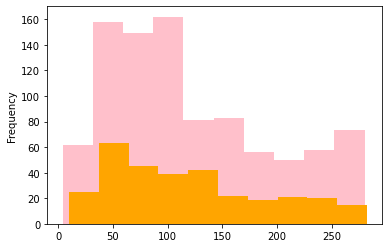

In [34]:
length_train = train['content'].str.len().plot.hist(color = 'pink', figsize = (6, 4))
length_test = test['content'].str.len().plot.hist(color = 'orange', figsize = (6, 4))

In [35]:
tokenized_tweet = train['content'].apply(lambda x: x.split()) 

# importing gensim
import gensim

# creating a word to vector model
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(train['content']), epochs=20)

(273005, 425560)

In [36]:
model_w2v.wv.most_similar(positive = "trump")

[('dangerous', 0.8043771386146545),
 ('j', 0.8034852743148804),
 ('loses', 0.798625111579895),
 ('resigns', 0.7961004972457886),
 ('other', 0.7930092811584473),
 ('kool', 0.7838907241821289),
 ('thinking', 0.7811256051063538),
 ('angry', 0.7798449993133545),
 ('landslidevictory', 0.7786258459091187),
 ('dum', 0.7775615453720093)]

In [37]:
model_w2v.wv.most_similar(negative = "trum")

[('vice', -0.3965284824371338),
 ('new', -0.43016815185546875),
 ('has', -0.4362739324569702),
 ('or', -0.4423113167285919),
 ('next', -0.44437089562416077),
 ('biden', -0.4527727961540222),
 ('christian', -0.45624104142189026),
 ('times', -0.46362370252609253),
 ('which', -0.4642241597175598),
 ('president', -0.46496111154556274)]

In [38]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import tensorflow.keras as keras


In [39]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalMaxPooling1D, Flatten, Conv1D, Dropout, Activation
from tensorflow.keras.preprocessing.text import Tokenizer

In [40]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anshi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [41]:
Tr=train["content"].values.tolist()
Te=test["content"].values.tolist()
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 500)
x_train = cv.fit_transform(Tr).toarray()
y_train = train.iloc[:, 0]
y_test=test.iloc[:,0]
print(x_train.shape)
print(y_train.shape)

cv = CountVectorizer(max_features = 500)
x_test = cv.fit_transform(Te).toarray()

print(x_test.shape)

(932, 500)
(932,)
(311, 500)


In [42]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)

x_test = sc.transform(x_test)

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9989270386266095
Validation Accuracy : 0.4565916398713826
F1 score : 0.4232081911262798
[[ 80  25]
 [144  62]]


In [44]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9935622317596566
Validation Accuracy : 0.5401929260450161
f1 score : 0.6433915211970075
[[ 39  66]
 [ 77 129]]


In [45]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9989270386266095
Validation Accuracy : 0.5080385852090032
f1 score : 0.5349544072948329
[[ 70  35]
 [118  88]]


In [46]:
from sklearn.svm import SVC

model = SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.953862660944206
Validation Accuracy : 0.6495176848874598
f1 score : 0.7841584158415842
[[  4 101]
 [  8 198]]


In [47]:
imdb_tokenizer = Tokenizer(num_words=500)
imdb_tokenizer.fit_on_texts(train['content'].values)
MAX_LEN=500

x_train_seq = imdb_tokenizer.texts_to_sequences(train['content'].values)
x_val_seq = imdb_tokenizer.texts_to_sequences(test['content'].values)

x_train = sequence.pad_sequences(x_train_seq, maxlen=MAX_LEN, padding="post", value=0)
x_val = sequence.pad_sequences(x_val_seq, maxlen=MAX_LEN, padding="post", value=0)

y_train, y_val = train['sentiment'].values, test['sentiment'].values

print('First sample before preprocessing: \n', train['content'].values[0], '\n')
print('First sample after preprocessing: \n', x_train[0])

First sample before preprocessing: 
 i just saw major pete in fox news nailed it again your answers were on point on message never distract w the squirrels excellent choiyof word liked especially the description of pence a christian who has to work with someone who paid hush money to a pornstar 

First sample after preprocessing: 
 [ 11  50 322  12  98  52   8  45  30 130  22 323  22 168 224   2   2   9
   1   6 137  59  46   3  20 268  59 225 365 250   3   6   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0 

In [48]:
NUM_FILTERS = 250
KERNEL_SIZE = 5
HIDDEN_DIMS = 250

BATCH_SIZE = 128 # Number of examples used in each iteration
EPOCHS = 20 # Number of passes through entire dataset
VOCAB_SIZE = 30000 # Size of vocabulary dictionary
MAX_LEN = 500 # Max length of review (in words)
EMBEDDING_DIM = 40 # Dimension of word embedding vector

In [49]:
print('Build model...')
model = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into EMBEDDING_DIM dimensions
model.add(Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_LEN))
model.add(Dropout(0.2))

# we add a Convolution1D, which will learn NUM_FILTERS filters
model.add(Conv1D(NUM_FILTERS,
                 KERNEL_SIZE,
                 padding='valid',
                 activation='relu',
                 strides=1))

# we use max pooling:
model.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
model.add(Dense(HIDDEN_DIMS))
model.add(Dropout(0.2))
model.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Build model...
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 40)           1200000   
_________________________________________________________________
dropout (Dropout)            (None, 500, 40)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 496, 250)          50250     
_________________________________________________________________
global_max_pooling1d (Global (None, 250)               0         
_________________________________________________________________
dense (Dense)                (None, 250)               62750     
_________________________________________________________________
dropout_1 (Dropout)          (None, 250)               0         
_________________________________________________________________
activation (Activation)      (None, 250) 

In [50]:
model.fit(x_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          validation_split=0.1,
          verbose=2)

# Evaluate the model
score, acc = model.evaluate(x_val, y_val, batch_size=BATCH_SIZE)
print('\nAccuracy: ', acc*100)

pred = model.predict_classes(x_val)

Epoch 1/20
7/7 - 1s - loss: 0.6772 - accuracy: 0.5835 - val_loss: 0.6559 - val_accuracy: 0.6383
Epoch 2/20
7/7 - 1s - loss: 0.6651 - accuracy: 0.6146 - val_loss: 0.6520 - val_accuracy: 0.6383
Epoch 3/20
7/7 - 1s - loss: 0.6575 - accuracy: 0.6146 - val_loss: 0.6460 - val_accuracy: 0.6383
Epoch 4/20
7/7 - 1s - loss: 0.6465 - accuracy: 0.6146 - val_loss: 0.6312 - val_accuracy: 0.6383
Epoch 5/20
7/7 - 1s - loss: 0.6268 - accuracy: 0.6146 - val_loss: 0.6032 - val_accuracy: 0.6383
Epoch 6/20
7/7 - 1s - loss: 0.5949 - accuracy: 0.6277 - val_loss: 0.5669 - val_accuracy: 0.7021
Epoch 7/20
7/7 - 1s - loss: 0.5467 - accuracy: 0.7088 - val_loss: 0.5184 - val_accuracy: 0.7128
Epoch 8/20
7/7 - 1s - loss: 0.4940 - accuracy: 0.7792 - val_loss: 0.4686 - val_accuracy: 0.7766
Epoch 9/20
7/7 - 1s - loss: 0.4370 - accuracy: 0.8437 - val_loss: 0.4302 - val_accuracy: 0.7872
Epoch 10/20
7/7 - 1s - loss: 0.3661 - accuracy: 0.8675 - val_loss: 0.4105 - val_accuracy: 0.7979
Epoch 11/20
7/7 - 1s - loss: 0.2951 - a

In [51]:
df4=data.replace('Positive',1).replace('Negative',0).replace('Neutral',-1)
df4

,sentiment,content
0,1,pence even better than biden beating trump wil...
1,1,pence mike is just plain likable
2,-1,pence i have thought about it however you put ...
3,1,mim light dilley acc while ago now bowie picke...
4,0,pence i actually feel a little sorry for joe h...
...,...,...
1995,-1,see all tomorrow stuff to do then the debate l...
1996,1,pence why do you keep saying this i thought yo...
1997,-1,pence looks like he s about to cry
1998,-1,we know that it was a hoax by the democrats pr...


In [52]:
X=df4['content']
Y=df4['sentiment']
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size = 0.25, random_state = 42)


In [53]:
TR=X_train.tolist()
TE=X_valid.tolist()
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 500)
X_Train = cv.fit_transform(TR).toarray()
Y1 = Y_train
Y_test=Y_valid
print(X_Train.shape)
print(Y1.shape)

cv = CountVectorizer(max_features = 500)
X_test = cv.fit_transform(TE).toarray()

print(X_test.shape)

(1500, 500)
(1500,)
(500, 500)


In [54]:
print(X_Train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_valid.shape)

(1500, 500)
(500, 500)
(1500,)
(500,)


In [55]:
model = RandomForestClassifier()
model.fit(X_Train, Y_train)

Y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_valid))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(Y_valid, Y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_valid, Y_pred)
print(cm)

Training Accuracy : 0.9953333333333333
Validation Accuracy : 0.482
F1 score : [0.58181818 0.30857143 0.42424242]
[[144  20  20]
 [ 49  27  37]
 [118  15  70]]


In [56]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_Train, Y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(Y_test, y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

Training Accuracy : 0.906
Validation Accuracy : 0.47
f1 score : [0.56465517 0.22619048 0.46195652]
[[131  21  32]
 [ 46  19  48]
 [103  15  85]]


In [57]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_Train, Y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(Y_test, y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

Training Accuracy : 0.9953333333333333
Validation Accuracy : 0.438
f1 score : [0.55140187 0.32       0.37888199]
[[118  39  27]
 [ 42  40  31]
 [ 84  58  61]]


In [58]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_Train, Y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(Y_test, y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

Training Accuracy : 0.87
Validation Accuracy : 0.506
f1 score : [0.60136674 0.064      0.53669725]
[[132   4  48]
 [ 41   4  68]
 [ 82   4 117]]


In [59]:
X_Train

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 3, 2, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]], dtype=int64)

In [60]:
imdb_tokenizer = Tokenizer(num_words=500)
TRain=pd.DataFrame(X_Train)
TEst=pd.DataFrame(X_test)
YTrain=pd.DataFrame(Y_train)
YTest=pd.DataFrame(Y_test)
imdb_tokenizer.fit_on_texts(TR)
MAX_LEN=500

x_train_seq = imdb_tokenizer.texts_to_sequences(TR)
x_val_seq = imdb_tokenizer.texts_to_sequences(TE)

x_train = sequence.pad_sequences(x_train_seq, maxlen=MAX_LEN, padding="post", value=0)
x_val = sequence.pad_sequences(x_val_seq, maxlen=MAX_LEN, padding="post", value=0)

y_train, y_val = YTrain['sentiment'].values, YTest['sentiment'].values

print('First sample before preprocessing: \n', TR, '\n')
print('First sample after preprocessing: \n', X_Train[0])

First sample before preprocessing: 
 ['pence you ve had years it was supposed to be easy', 'i haven t seen one in my neck of the woods but i ve seen hundreds of trump pence signs', 'pence he already brought the economy back to', 'pence are you better off than you were years ago', 'so i missed the debate i thought it was pm eastern time', 'it s gonna be a great night says vp pence at pre debate rally in pa says trump is ready for the debate pence told supporters in a dairy barn in lancaster county that the pres will take our case to the american people and take the fight straight to joe biden', 'pence you get out it will smell better', 'pence coz you failed the first try you want a do over', 'pence it was great till you morons came along and ruined it', 'pence you should be prepping for your debate cause you re going to need all the help you can get', 'borat gift of pornographic monkey to vice premiere mikhael pence to make benefit recently diminished nation of kazakhstan borat imminent

In [61]:
NUM_FILTERS = 250
KERNEL_SIZE = 5
HIDDEN_DIMS = 250

BATCH_SIZE = 128 # Number of examples used in each iteration
EPOCHS = 20 # Number of passes through entire dataset
VOCAB_SIZE = 30000 # Size of vocabulary dictionary
MAX_LEN = 500 # Max length of review (in words)
EMBEDDING_DIM = 40 # Dimension of word embedding vector

In [62]:
print('Build model...')
model = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into EMBEDDING_DIM dimensions
model.add(Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_LEN))
model.add(Dropout(0.2))

# we add a Convolution1D, which will learn NUM_FILTERS filters
model.add(Conv1D(NUM_FILTERS,
                 KERNEL_SIZE,
                 padding='valid',
                 activation='relu',
                 strides=1))

# we use max pooling:
model.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
model.add(Dense(HIDDEN_DIMS))
model.add(Dropout(0.2))
model.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Build model...
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 40)           1200000   
_________________________________________________________________
dropout_2 (Dropout)          (None, 500, 40)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 496, 250)          50250     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 250)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 250)               62750     
_________________________________________________________________
dropout_3 (Dropout)          (None, 250)               0         
_________________________________________________________________
activation_2 (Activation)    (None, 250

In [63]:
model.fit(x_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          validation_split=0.1,
          verbose=2)

# Evaluate the model
score, acc = model.evaluate(x_val, y_val, batch_size=BATCH_SIZE)
print('\nAccuracy: ', acc*100)

pred = model.predict_classes(x_val)

Epoch 1/20
11/11 - 2s - loss: 0.4094 - accuracy: 0.2281 - val_loss: 0.2725 - val_accuracy: 0.2867
Epoch 2/20
11/11 - 2s - loss: 0.0487 - accuracy: 0.2267 - val_loss: 0.3213 - val_accuracy: 0.2867
Epoch 3/20
11/11 - 2s - loss: -3.3962e-02 - accuracy: 0.2267 - val_loss: 0.4001 - val_accuracy: 0.2867
Epoch 4/20
11/11 - 2s - loss: -5.8200e-02 - accuracy: 0.2267 - val_loss: 0.4578 - val_accuracy: 0.2867
Epoch 5/20
11/11 - 2s - loss: -1.2452e-01 - accuracy: 0.2267 - val_loss: 0.2861 - val_accuracy: 0.2867
Epoch 6/20
11/11 - 2s - loss: -4.0924e-01 - accuracy: 0.2267 - val_loss: -2.7666e-02 - val_accuracy: 0.2867
Epoch 7/20
11/11 - 2s - loss: -1.2268e+00 - accuracy: 0.2267 - val_loss: -9.5609e-01 - val_accuracy: 0.2867
Epoch 8/20
11/11 - 2s - loss: -3.4328e+00 - accuracy: 0.2267 - val_loss: -2.8926e+00 - val_accuracy: 0.2933
Epoch 9/20
11/11 - 2s - loss: -8.9721e+00 - accuracy: 0.2319 - val_loss: -6.7441e+00 - val_accuracy: 0.3267
Epoch 10/20
11/11 - 2s - loss: -2.0716e+01 - accuracy: 0.2341 -